# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Step 1: Reading and Understanding the Data

In [1]:
# Importing required libraries and warnings 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [2]:
Bike_data = pd.read_csv('day.csv')

## EDA on the read data

In [3]:
# Checking first five rows of the data
Bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking size of the data
Bike_data.shape

(730, 16)

In [5]:
# Checking data types of columns and null analysis

Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All data points are non-null and therefore do not require any missing value treatment or further analysis.

In [6]:
# Checking the columns
Bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Checking the spread of numerical columns

Bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can Observed many columns are cateogarical however data presentation is in numeric . To do EDA and understanding data ,converting 
column to exact string cateogaical value (season, yr,mnth,holiday,weekday,workingday,weathersit)

In [8]:
# Assigning string values to  seasons in place of numeric values. 
# 1=spring
Bike_data.loc[(Bike_data['season'] == 1) , 'season'] = 'spring'

# 2=summer
Bike_data.loc[(Bike_data['season'] == 2) , 'season'] = 'summer'

# 3=fall
Bike_data.loc[(Bike_data['season'] == 3) , 'season'] = 'fall'

# 4=winter
Bike_data.loc[(Bike_data['season'] == 4) , 'season'] = 'winter'


In [9]:
# verifying changed value properly changed or not. 
Bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Now verifying unique value counts . 
Bike_data.value_counts('season')

season
fall      188
summer    184
spring    180
winter    178
dtype: int64

In [11]:
# verifying year column (0: 2018, 1:2019)
Bike_data['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [12]:
# Assigning string name to different months inplace of numeric values.

def month_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

Bike_data[['mnth']] = Bike_data[['mnth']].apply(month_map)

In [13]:
# verifying unique value counts and conversion . 
Bike_data.value_counts('mnth')

mnth
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
dtype: int64

In [14]:
# whether day is a holiday or not (0: No, 1: Yes)

Bike_data['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
# Assigning string name to different Days inplace of numeric values.
def day_map(x):
    return x.map({1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

# Applying the function to the column
Bike_data[['weekday']] = Bike_data[['weekday']].apply(day_map)

In [16]:
# verifying unique value counts and conversion .

Bike_data.value_counts('weekday')

weekday
Mon      105
Tues     105
Fri      104
Sat      104
Sun      104
Thurs    104
Wed      104
dtype: int64

In [17]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0

Bike_data['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [18]:
# Now we Replace long weathersit details into short string values understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
Bike_data.loc[(Bike_data['weathersit'] == 1) , 'weathersit'] = 'Clear'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
Bike_data.loc[(Bike_data['weathersit'] == 2) , 'weathersit'] = 'Mist'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
Bike_data.loc[(Bike_data['weathersit'] == 3) , 'weathersit'] = 'Light'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Bike_data.loc[(Bike_data['weathersit'] == 4) , 'weathersit'] = 'Heavy'

In [19]:
# verifying unique value counts and conversion . 

Bike_data.value_counts('weathersit')

weathersit
Clear    463
Mist     246
Light     21
dtype: int64

# Step 2: Now Visualising the Data
1) To check multicollinearity in dataset

2) To identify if some predictors directly have a strong association with the Target variable

3) We are visualising our data using matplotlib and seaborn.

4) Understanding the distribution of various numeric variables

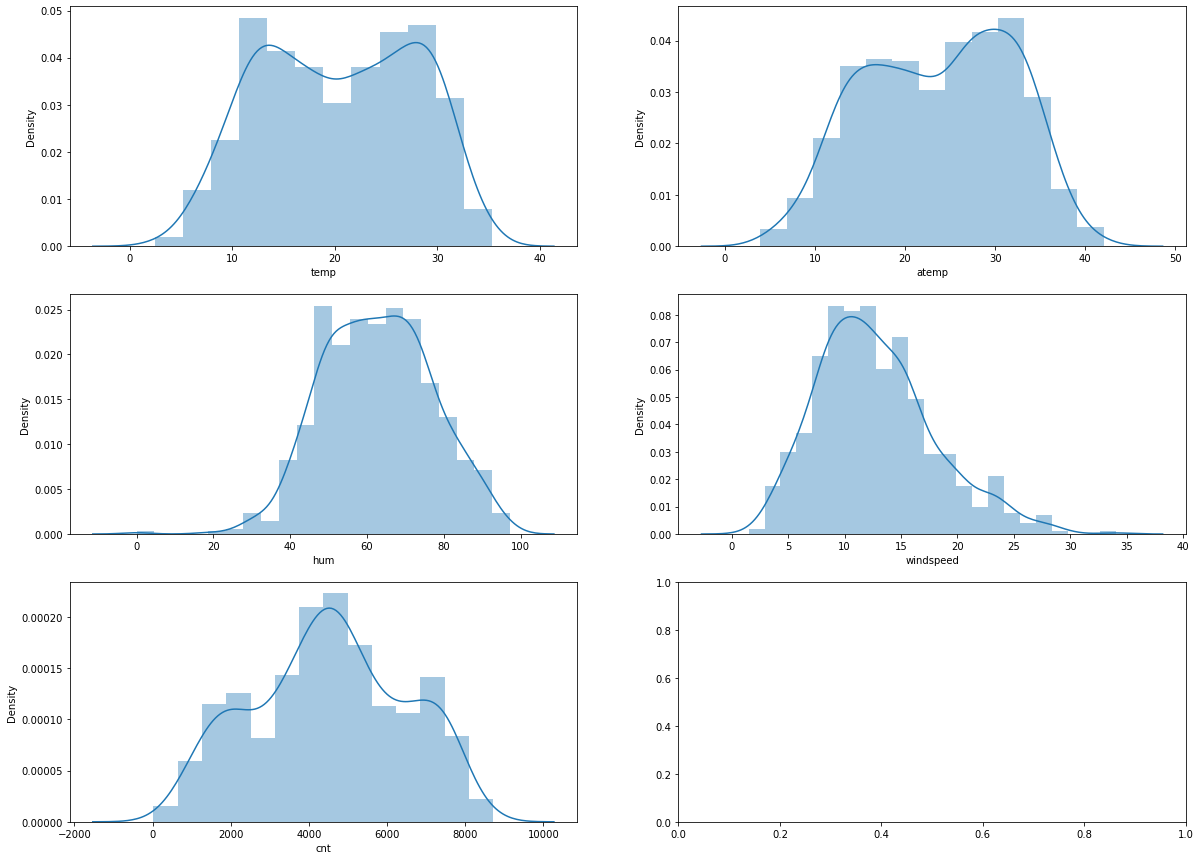

In [21]:
# Importing libraries required 
import matplotlib.pyplot as plt
import seaborn as sns

# plotting distplot 

plt.figure(figsize=(20, 15))  
plt.subplot(3,2,1)
sns.distplot(Bike_data['temp'])
plt.subplot(3,2,2)
sns.distplot(Bike_data['atemp'])
plt.subplot(3,2,3)
sns.distplot(Bike_data['hum'])
plt.subplot(3,2,4)
sns.distplot(Bike_data['windspeed'])
plt.subplot(3,2,5)
sns.distplot(Bike_data['cnt'])
plt.subplot(3,2,6)
plt.show()



In [22]:
#checking all columns of dataset

Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [23]:
# checking importance of all columns , observed column instant ,dteday are not relevant Therefore dropping these columns

Bike_data.drop(['instant','dteday'], axis = 1, inplace = True)
Bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Now we are visualising all Numeric Variables by making pairplot, correlation matrix and heat map  of all the numeric variables with  target variables

 ## Performing numerical and categorical analysis on the data

In [24]:
# Joining all numeric variables in the dataset as Data_bike_numeric

Data_bike_numeric = ['temp','atemp','hum','windspeed','casual','registered','cnt']
Bike_data[Data_bike_numeric].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


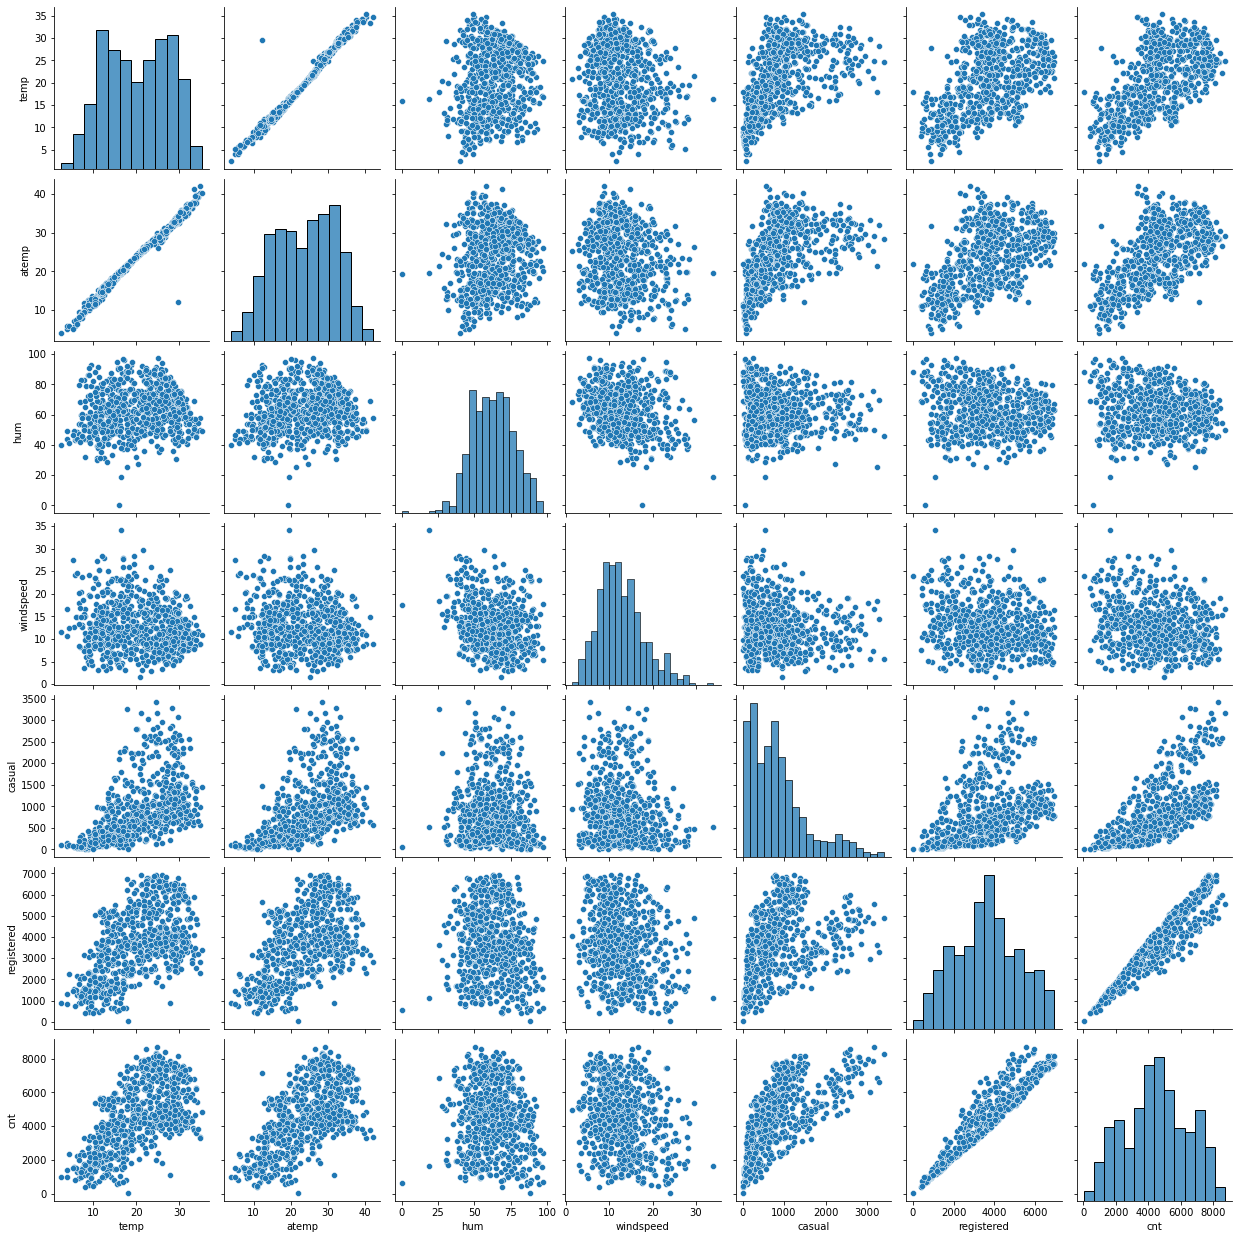

In [25]:
# plotting pair plot for numerical variables 

sns.pairplot(Bike_data[Data_bike_numeric])
plt.show()

In [26]:
# Correlation matrix for both dataset
cor = Bike_data[Data_bike_numeric].corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


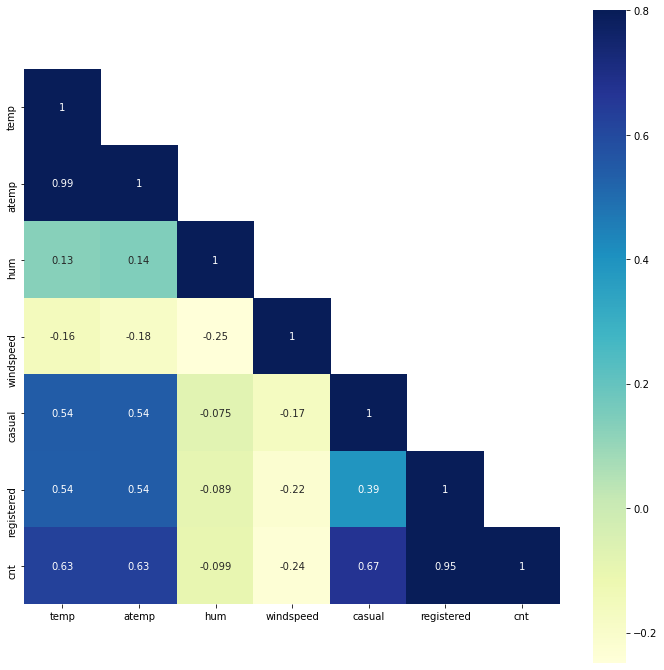

In [48]:
# plotting heatmap for the correlation matrix
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(cor, mask=mask,vmax=.8, cmap="YlGnBu", square=True,annot=True)
plt.show()

Insights shown in the heatmap above:

The Below Correlation of Count('cnt') which is dependent/Target variable with independent variables:

1)Count('cnt') is highly (positively) correlated with 'casual' and 'registered'.Also it is high with 'temp' and 'atemp'. We know the high positive correlation of count with 'registered' and 'casual' are beacause both of them together add and represent count.

Count is negatively correlated to 'windspeed' (-0.24 approx) and humidity. This gives us insight that the shared bikes demand will be less on windy days as compared to normal days.

Correlation between independent variables:

Some of the independent variables are highly correlated like atemp and temp are highly (positively) correlated. The correlation between the two are approx  equal to 1.

Thus, while building the model, we'll need to take care of multicollinearity.

In [30]:
# To reduce multicolinarity from the data removing atemp column as it is highly correlated with temp
Bike_data.drop('atemp',axis=1,inplace=True)  
Bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tues,1,Mist,14.902598,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


### Visualising Categorical Variables by making boxplot for the independent variables with target variables.

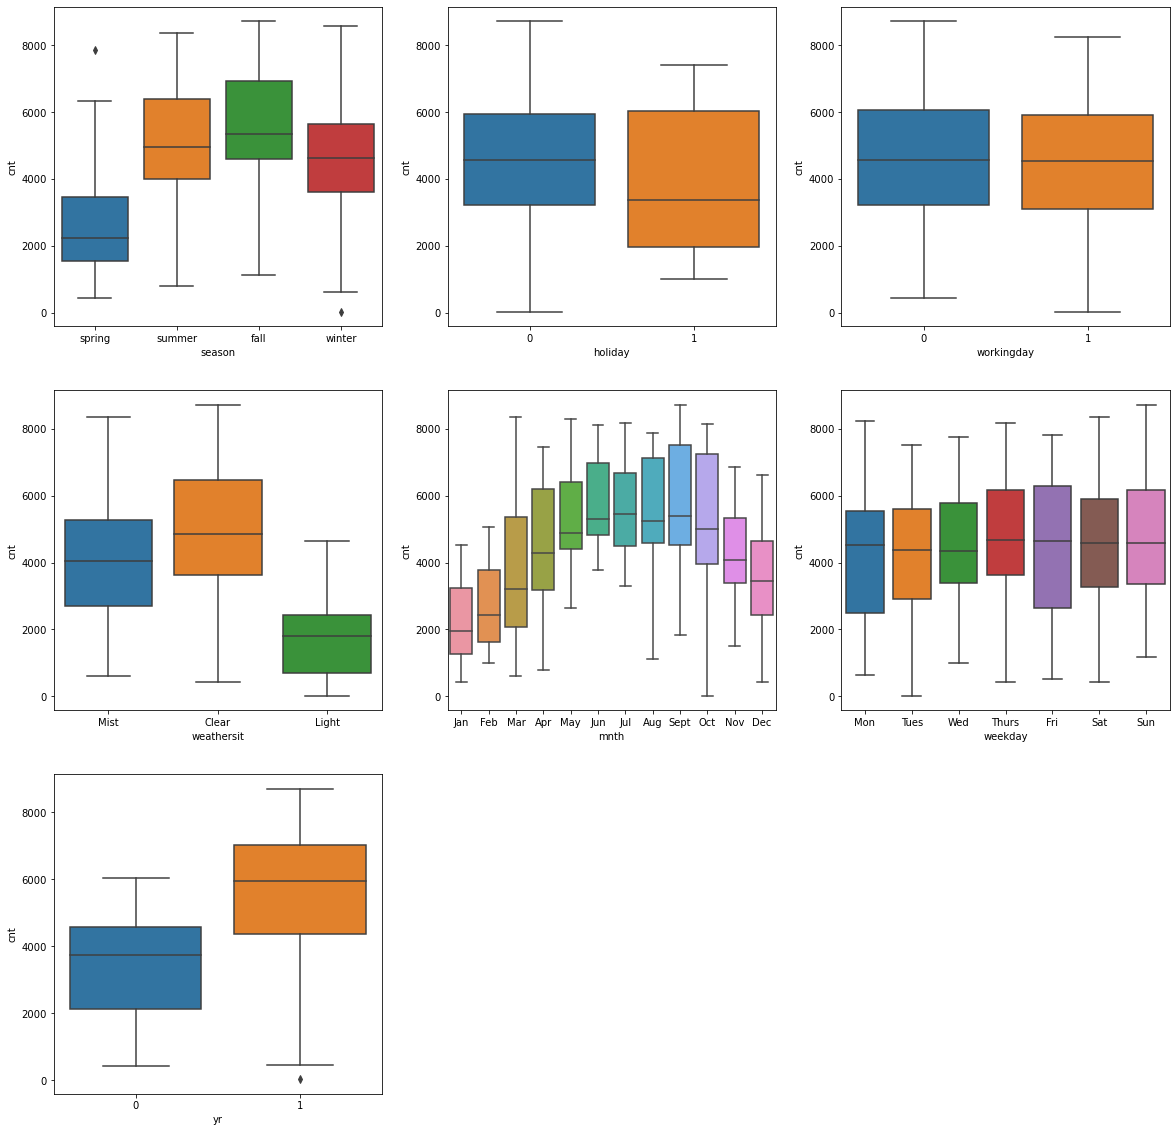

In [31]:
# Plotting Box Plots for categorical variables

plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_data)
plt.show()


### Important Inferences from EDA of categorical and numerical variables:

1) Bike usage is more in fall season and clear day.

2) usage increases in 2019 than 2018.

3) Season - We can see a positive trend in the number of customers in 2 - Summer, 3 - Fall and 4 - Winter seasons.

4) Year - The overall business shows a increasing trend in their user base year on year

5) Month - Similar to the season trend, there is a postive trend in the months of summer, fall and winter.

6) Holiday : On holidays, the users show a wider spread in the counts. On normal days, the users are more than holidays

# 3. Data Preparation

To Convert categorical variables into dummy variables

List of categorical variables:

1. season : 1:spring, 2:summer, 3:fall, 4:winter
2. yr: 0: 2018, 1:2019
3. months : 1 to 12
4. holiday : 0 and 1
5. workingday : 0 and 1
6. weekday : 1 to 6
7. weathersit : 1, 2, 3 and 4

From above the list of columns we do not need to convert yr, holiday and workingday since they are already in a binary format. We will go ahead with converting the other columns.

In [32]:
#checking data
Bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tues,1,Mist,14.902598,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


Preparing the data to build the model. we should note that we had not included 'yr', 'holiday'and 'workingday' as object variables in the initial data exploration steps to avoid too many dummy variables creation as they have binary values: 0s and 1s in them which have specific meanings .

In [33]:
# Subset all categorical variables
Bike_data_categorical=Bike_data.select_dtypes(include=['object'])
Bike_data_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,Mist
1,spring,Jan,Tues,Mist
2,spring,Jan,Wed,Clear
3,spring,Jan,Thurs,Clear
4,spring,Jan,Fri,Clear


The variable season,mnth,weekday and weathersit have different values. We need to convert these levels into integers.

For this, we will use dummy variables.

In [34]:
# Converting into dummies

Bike_data_dummies = pd.get_dummies(Bike_data_categorical, drop_first=True)
Bike_data_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Droping categorical variable columns

Bike_data = Bike_data.drop(list(Bike_data_categorical.columns), axis=1)

In [36]:
# Checking the head of dataset
Bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,0,0,1,14.110847,80.5833,10.749882,331,654,985
1,0,0,1,14.902598,69.6087,16.652113,131,670,801
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600


In [37]:
# Concatinating dummy variables in the original dataframe

Bike_data = pd.concat([Bike_data, Bike_data_dummies], axis=1)

In [38]:
# Again cheking the head of the dataset
Bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


# 4.Model Building and Evaluation

### Splitting the data into test and train datasets

In [39]:
# first, loading libraries from sklearn
from sklearn.model_selection import train_test_split

In [40]:
# Splitting the dataframe into train and test sets

np.random.seed(0)
df_train, df_test = train_test_split(Bike_data, train_size=0.7, test_size=0.3, random_state=100)

In [41]:
# Checking the shape of train dataset
df_train.shape

(510, 31)

In [42]:
# Checking the shape of train dataset

df_test.shape

(219, 31)

# Scaling

After test-train split, we need to scale the variables for better Analysis. we will scale the numeric columns and not the dummy variables. Also, we will do scaling on the train dataset only.

From the data, we can see temp, atemp, hum and windspeed have larger and decimal values compared to others. We can normalized the numbers using the MinMax method and have all the numbers within 0 and 1 range.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# Applying scaler() to all the columns 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [45]:
# Checking datset
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,0,0,1,0,0,1
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,1,0,0,0,0,0,0,1


### Checking linearity and corealtion in the train dataset after rescaling and dummy field conversion

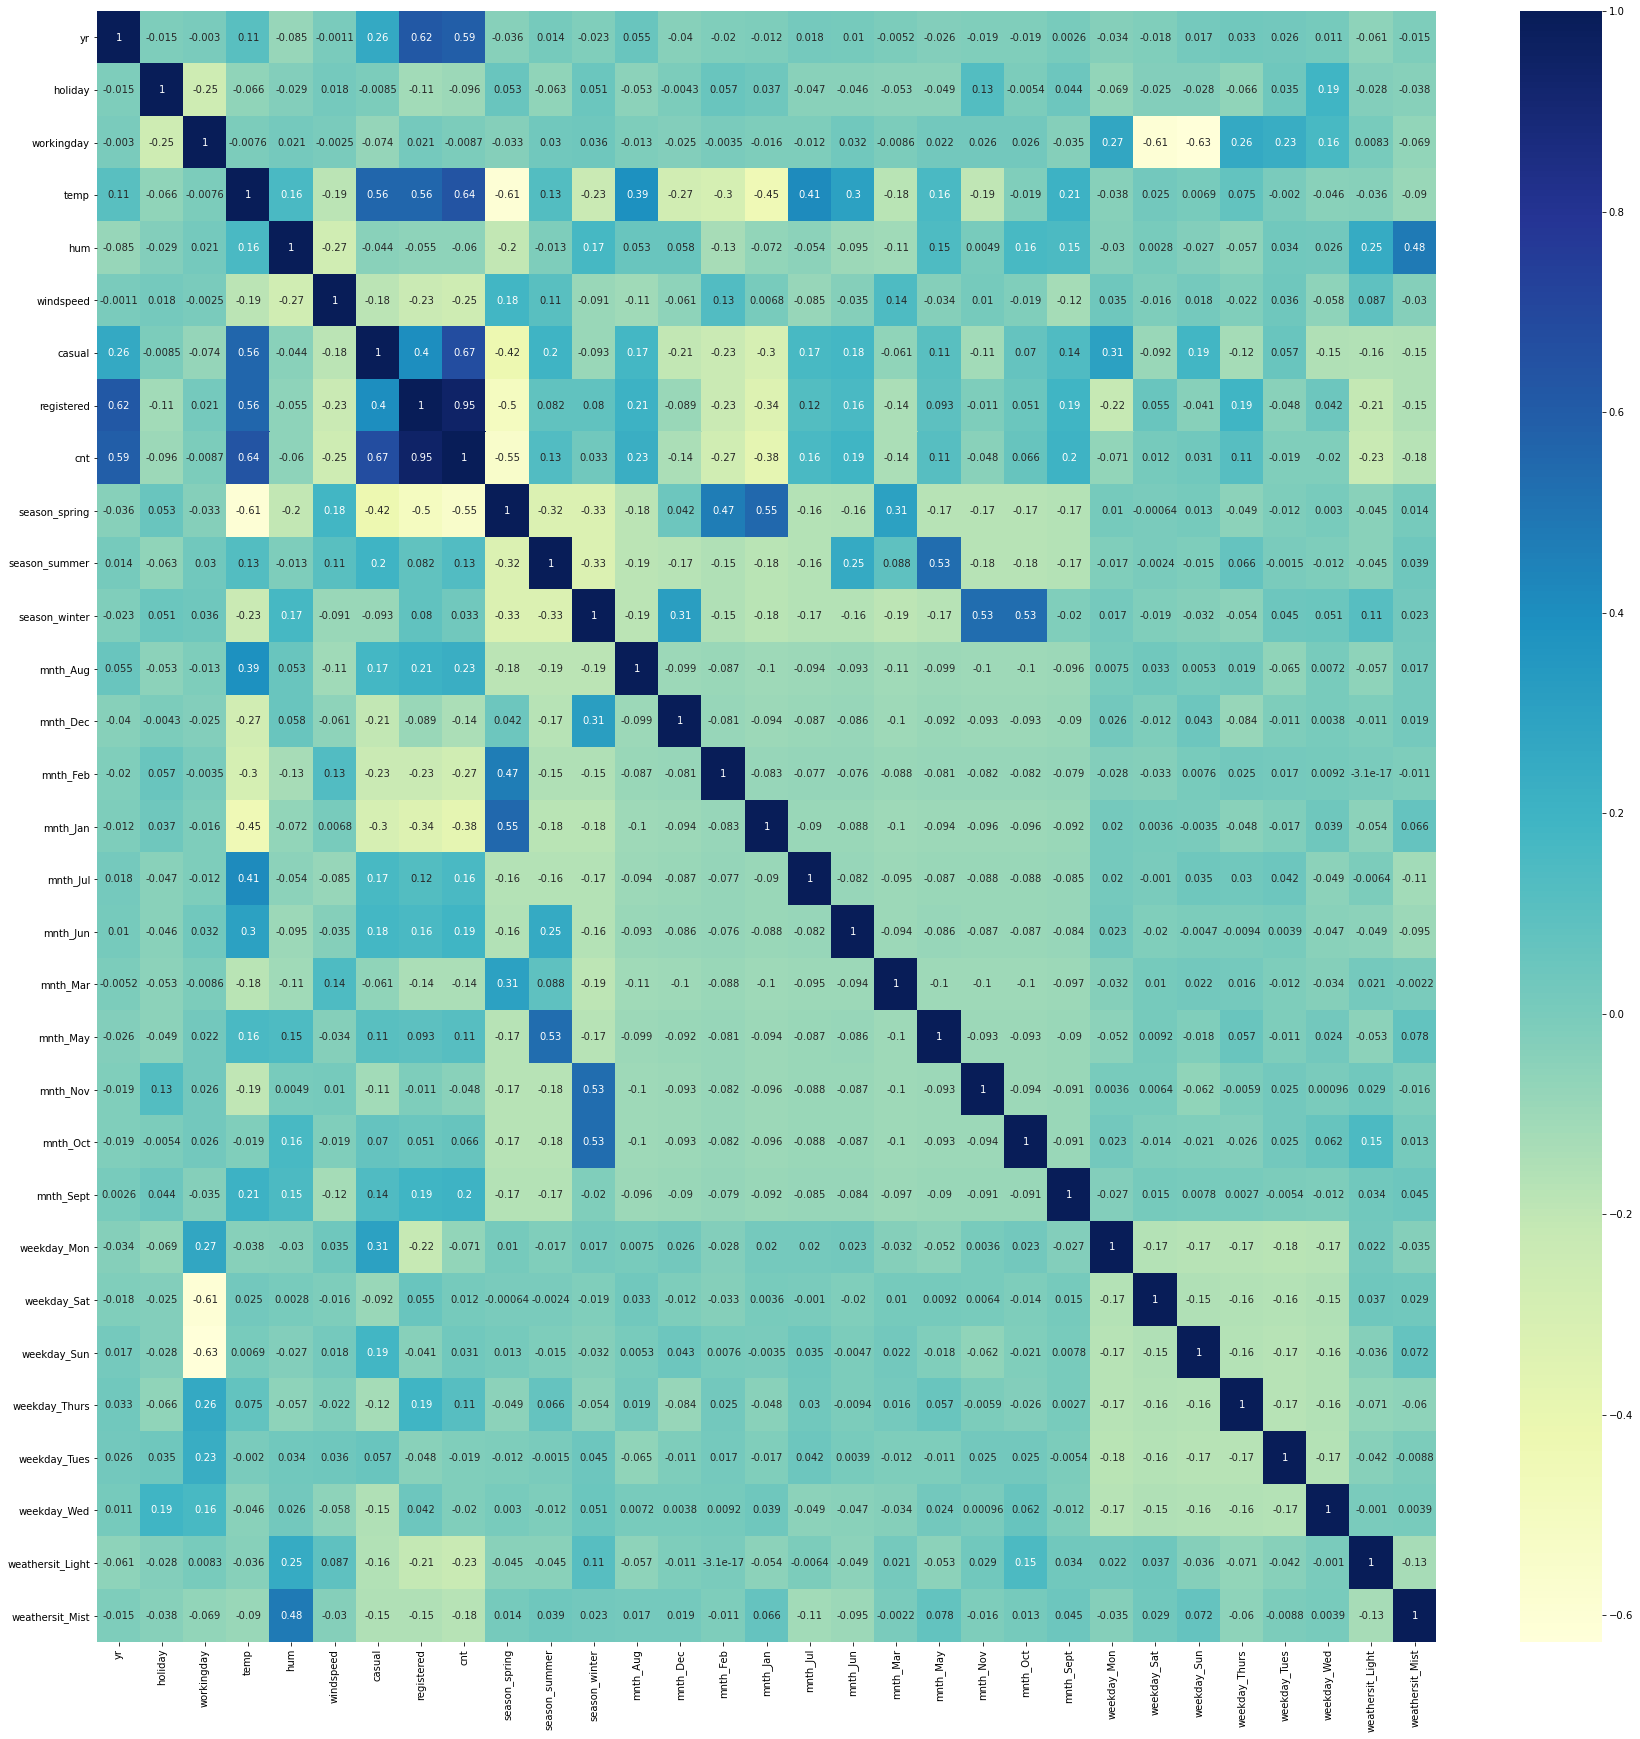

In [46]:
# Plotting a heatmap to check linearity

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")

plt.show()

In [49]:
# Checking minimum and maximum values of the normalized variables

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Dropping 'casual' and 'registered' as together sum equal to cnt and Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [51]:
X_train.shape

(510, 28)

# Building our model


We will build our first model with all the features using statsmodels then we will eliminate using RFE(Recursive feature elimination)

In [52]:
# First importing all the libraries required

import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [53]:
# Now adding a constant in X_train dataset

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const               0.394543
yr                  0.230857
holiday            -0.135424
workingday         -0.060524
temp                0.445458
hum                -0.157315
windspeed          -0.183046
season_spring      -0.043705
season_summer       0.042243
season_winter       0.110897
mnth_Aug            0.021507
mnth_Dec           -0.045669
mnth_Feb           -0.037279
mnth_Jan           -0.063612
mnth_Jul           -0.034910
mnth_Jun            0.000975
mnth_Mar            0.000608
mnth_May            0.024064
mnth_Nov           -0.041555
mnth_Oct            0.005790
mnth_Sept           0.086055
weekday_Mon        -0.024633
weekday_Sat        -0.056319
weekday_Sun        -0.049961
weekday_Thurs       0.003863
weekday_Tues       -0.026299
weekday_Wed        -0.011241
weathersit_Light   -0.251511
weathersit_Mist    -0.059355
dtype: float64

In [54]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
# Checking summary of the model

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          4.33e-179
Time:                        20:53:42   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3945      0.085      4.640      0.000       0.227       0.562
yr                   0.2309      0.008     28.387      0.000       0.215       0.247
holiday             -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday          -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                 0.4455      0.047      9.513      0.000       0.353       0.537
hum                 -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed           -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring       -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer        0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter        0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug             0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec            -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb            -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan            -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul            -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun             0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar             0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May             0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov            -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct             0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sept            0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Mon         -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_Sat         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_Sun         -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_Thurs        0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_Tues        -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_Wed         -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Mist     -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. N

This model has an Adjusted R-squared value of 84.2% which seems  good. But we need to check we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.Also P value is greater in many independent varibales so we will use both RFE and Manual to reduce features and good adjusted r -squared.

As we have  28 features ,we will start with 15 using RFE 

### Using RFE to select variables

In [56]:
# First importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
# Creating a RFE object
# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True False  True  True  True  True  True  True False  True False
  True  True False False False  True False  True False False False False
 False False  True  True]
[ 1  1  3  1  1  1  1  1  1  9  1  2  1  1 13 14  6  1 11  1  8  4  5 12
  7 10  1  1]



Now we will verify the summary of this model using statsmodels.

In [58]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_Light,weathersit_Mist
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [59]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.34e-189
Time:                        20:53:54   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3202      0.036  

The new model with elected features doesn't show dip in the adjusted R square in comparison to the model which was built on all the features. It has gone from 84.2% to 84.1%. 

Now We can reduce number of features near to 8 

Also we will once verify multicollinearity among these variables.

In [60]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Dropping constant variable

a=X_train_rfe1.drop('const',axis=1)

In [62]:
# Now Creating dataframe having all the feature variables and their respective VIFs 

vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_Mist,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


In [63]:
# RFE with 8 features
lm = LinearRegression()
rfe2 = RFE(lm, 8)

# Fit with 8 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_) 

[ True  True False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False  True False]
[ 1  1 10  1  1  1  1  5  2 16  8  9  6  1 20 21 13  7 18  3 15 11 12 19
 14 17  1  4]


In [64]:
# Than Subset the features selected by rfe2
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 8 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_Light
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0


In [65]:
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.0
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          8.21e-179
Time:                        20:54:06   Log-Likelihood:                 470.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     501   BIC:                            -884.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4318      0.030  

In [66]:
# Checking for the VIF values of the independent features variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Dropping constant variable
    
b=X_train_rfe2.drop('const',axis=1)

In [68]:
# Creating a dataframe with all the feature variables and their respective VIFs 

vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.49
2,temp,10.38
4,windspeed,3.89
0,yr,2.03
5,season_spring,1.80
6,mnth_Jul,1.35
7,weathersit_Light,1.11
1,holiday,1.03


As we can see from the model summary above, all the variables have p-value < 0.05 . But there are a few variables which have VIF > 5. Therefore we will drop column one by one afer analysing outcome 

Now we can start with removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [69]:
# Let's drop the 'hum' column

X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,mnth_Jul,weathersit_Light
653,1.0,1,0,0.509887,0.300794,0,0,0
576,1.0,1,0,0.815169,0.264686,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0


In [70]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 7 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     279.8
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          9.08e-169
Time:                        20:54:16   Log-Likelihood:                 443.86
No. Observations:                 510   AIC:                            -871.7
Df Residuals:                     502   BIC:                            -837.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2627      0.020  

In [71]:
# Dropping const variable
c=X_train_rfe2.drop('const',axis=1)

In [72]:
# Creating a dataframe having all the feature variables and their respective VIFs except for the constant

vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.95
3,windspeed,3.73
0,yr,2.03
4,season_spring,1.50
5,mnth_Jul,1.26
6,weathersit_Light,1.05
1,holiday,1.03


In the summary above all the VIF values and p-values are in the permissible range now. Also the Adjusted R-squared value has dropped from 84.2% with 28 variables to 79.3% using 7 variables. So let's proceed with this model.

# Residual Analysis
Before making predictions on the test data, analysing the residuals.

In [73]:
y_train_cnt = lm3.predict(X_train_rfe2)

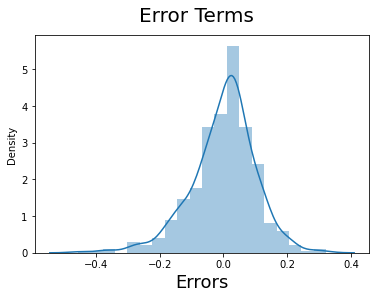

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  
plt.show()

The error terms are approximately normally distributed

# Making Predictions on test Data 

For Making Predictions
We would first need to scale the test set as well. 

In [75]:
#Printing the variables to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [76]:
#Applying scaling on test data

df_test[var] = scaler.transform(df_test[var])

In [77]:
# Spliting the 'df_test' set into X and y after scaling and dropping casual and registered as we did with train data

y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [78]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
# check the list 'col2' which had the 7 variables RFE had selected

col2=c.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'mnth_Jul',
       'weathersit_Light'],
      dtype='object')

In [80]:
# subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe1 = X_test[col2]

In [81]:
# By add a constant to the test set created
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             219 non-null    float64
 1   yr                219 non-null    int64  
 2   holiday           219 non-null    int64  
 3   temp              219 non-null    float64
 4   windspeed         219 non-null    float64
 5   season_spring     219 non-null    uint8  
 6   mnth_Jul          219 non-null    uint8  
 7   weathersit_Light  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(3)
memory usage: 10.9 KB


In [82]:
# Now Making predictions

y_pred = lm3.predict(X_test_rfe1)

## Model Evaluation

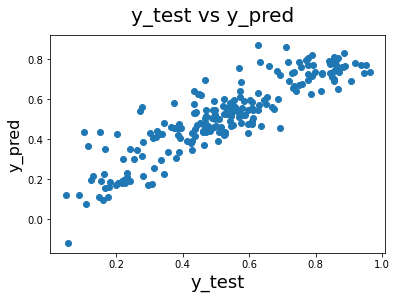

In [83]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                          # Y-label
plt.show()

In [84]:
# r2_score for 7 variables

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7835777059426586

For the model with 7 variables, the r-squared on training and test data is about 79.3% and 78.03% respectively. 

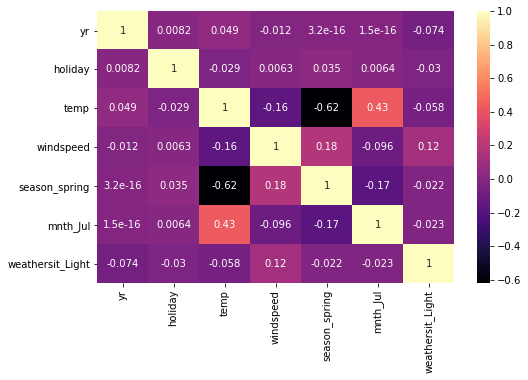

In [86]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(Bike_data[col2].corr(), cmap="magma", annot=True)
plt.show()

Thus, the final model consists of the 7 variables mentioned above.we can use this model for predicting count of daily bike rentals.

## Summary of the given assignment

1. A dataset with 512 rows of data with the target and feature variables.
2. Performed EDA on the dataset to check for significant inferences and identify variables for data preparation. Used scatter plots for numerical and boxplots for categorical variables.
3. Prepared the data by converting categorical variables into dummy variables.
    - season
    - weathersit
    - month
    - weekday
    - registered
4. Dropped irrelevant and categorical variables from the data.
    - season
    - weathersit
    - month
    - weekday
    - instant
    - dteday
    - atemp
    - registered
    - casual
5. Split the data into test and train datasets in a 70:30 ratio.
6. Rescaled numerical variables using MinMax method.
7. Plotted a heatmap to check linearity among all the variables and identified temp to be the most significant feature.
8.  Performed residual analysis to confirm assumption of residuals hold true.
9. Made predictions on the train data.
10. Finally evaluated the model on test data with 79.3 % accuracy.